1. построить графики зависимости целевой переменной от остальных, выявить зависимости (второй вопрос другими словами)

In [18]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression,BayesianRidge
from sklearn.model_selection import cross_validate,cross_val_score
from sklearn.preprocessing import PolynomialFeatures, KBinsDiscretizer


In [2]:
data=pd.read_csv('lab01.csv')
del data['Unnamed: 0']
data.head()

,x1,x2,x3,x4,x5,target
0,осень,6.0,10.0,684.853714,489.727534,127000.0
1,лето,6.0,5.0,787.439842,129.226659,54200.0
2,лето,7.0,8.0,934.334854,996.189811,107600.0
3,зима,7.0,7.0,507.949612,553.560324,91800.0
4,зима,10.0,10.0,154.831480,88.940079,171500.0


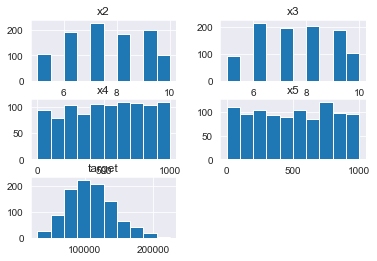

In [3]:
data.hist()
plt.show()

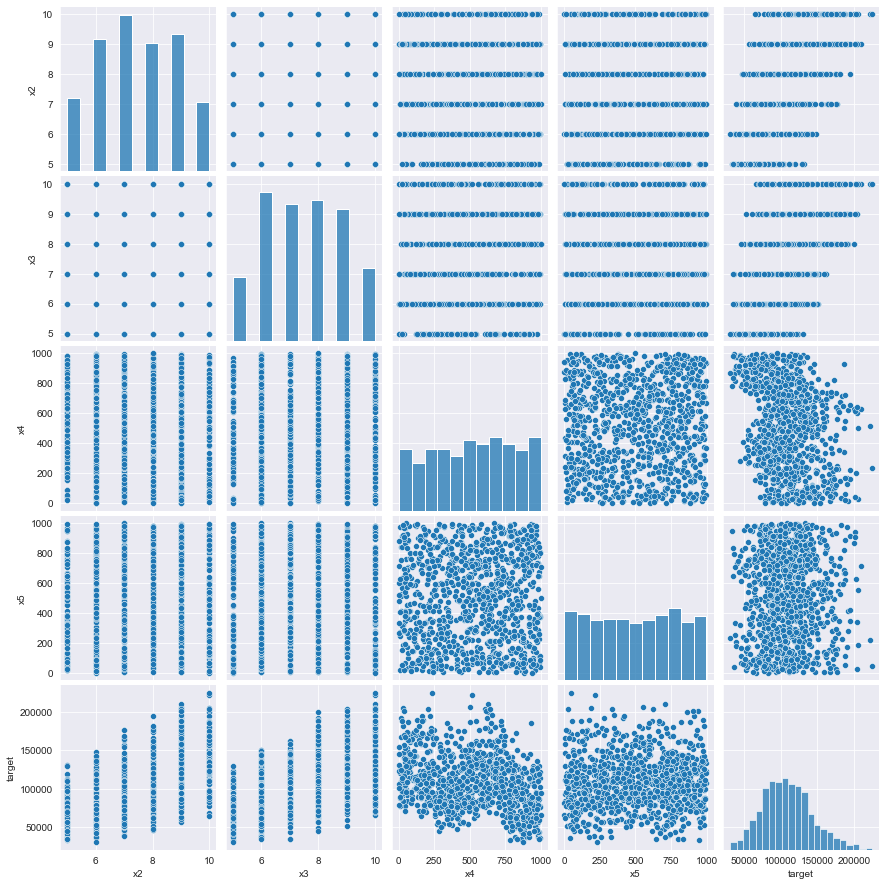

In [4]:
# парная диаграмма
# можно использовать heatmap
sns.pairplot(data)
plt.show()

2. Посмотреть корреляцию между переменными (первый вопрос другими словами)

In [5]:
# коэффициент корреляции (пирсона)= ковариация/(sigma1*sigma2)
new_df=pd.get_dummies(data)
new_df.corr()

,x2,x3,x4,x5,target,x1_весна,x1_зима,x1_лето,x1_осень
x2,1.000000,-0.031210,0.030458,0.047308,0.556719,0.030420,-0.010294,-0.004061,-0.016338
x3,-0.031210,1.000000,0.040714,0.001254,0.522521,-0.009601,0.006544,-0.014959,0.018342
x4,0.030458,0.040714,1.000000,0.010863,-0.297098,0.006076,0.010955,0.013396,-0.030931
x5,0.047308,0.001254,0.010863,1.000000,0.027597,-0.007399,-0.006646,-0.004274,0.018617
target,0.556719,0.522521,-0.297098,0.027597,1.000000,0.019340,-0.267587,0.316556,-0.070209
x1_весна,0.030420,-0.009601,0.006076,-0.007399,0.019340,1.000000,-0.337792,-0.339584,-0.327935
x1_зима,-0.010294,0.006544,0.010955,-0.006646,-0.267587,-0.337792,1.000000,-0.338686,-0.327067
x1_лето,-0.004061,-0.014959,0.013396,-0.004274,0.316556,-0.339584,-0.338686,1.000000,-0.328802
x1_осень,-0.016338,0.018342,-0.030931,0.018617,-0.070209,-0.327935,-0.327067,-0.328802,1.000000


3. Рассмотреть линейную, полиномиальную и кусочно-постоянную модели

In [8]:
x = new_df.drop('target', axis = 1)
y = new_df['target']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model=LinearRegression()
results = cross_validate(estimator=model, X=x_train, y=y_train,
                           scoring='r2', cv=5,
                           return_train_score=True,
                           return_estimator=True)
print(results)
val_results=cross_val_score(estimator=model, X=x_test, y=y_test,
                            cv=5, scoring = 'r2')
print('--------')
print(val_results)

{'fit_time': array([0.00378418, 0.00209689, 0.00184393, 0.00178623, 0.00161791]), 'score_time': array([0.00091696, 0.00095987, 0.00069094, 0.00067711, 0.00065398]), 'estimator': [LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression()], 'test_score': array([0.83860046, 0.86546917, 0.85385812, 0.82382837, 0.82423221]), 'train_score': array([0.84765117, 0.84064223, 0.84503739, 0.8520304 , 0.85171145])}
--------
[0.84475633 0.86964435 0.87681137 0.91628665 0.79132448]


In [20]:
poly_features = PolynomialFeatures(degree=(1,5))
x_poly=poly_features.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2)

model = LinearRegression()

results = cross_validate(estimator=model, X=x_train, y=y_train,
                         scoring='r2', cv=5,
                         return_train_score=True,
                         return_estimator=True)
print(results)

val_results=cross_val_score(estimator=model, X=x_test, y=y_test,
                            cv=5, scoring = 'r2')
# print('--------')
# print(val_results)

{'fit_time': array([0.6082139 , 0.66593504, 0.63470006, 0.55405879, 0.57568002]), 'score_time': array([0.00076795, 0.00122905, 0.00122905, 0.00062633, 0.00119901]), 'estimator': [LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression()], 'test_score': array([0.83903826, 0.84241332, 0.69043702, 0.84219315, 0.85317423]), 'train_score': array([0.96469618, 0.96715711, 0.95928026, 0.96603107, 0.96559003])}


In [17]:
results['estimator'][0].__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1287,
 'coef_': array([  56.75618015, -207.71684705,   26.16118326, ...,    0.        ,
           0.        ,   75.79096651]),
 'rank_': 311,
 'singular_': array([9.77475134e+15, 6.77320406e+15, 3.01753100e+15, 1.20134754e+15,
        3.38588601e+14, 6.37001625e+13, 2.21391035e+13, 1.92522710e+13,
        1.23521874e+13, 1.01104162e+13, 7.09294700e+12, 6.65757162e+12,
        6.40371639e+12, 5.65597428e+12, 4.51694892e+12, 3.52283485e+12,
        3.40229725e+12, 3.23084815e+12, 1.87310991e+12, 1.59642822e+12,
        1.55425595e+12, 1.51441744e+12, 1.33771167e+12, 8.67218683e+11,
        6.01632812e+11, 5.16664021e+11, 4.88908305e+11, 4.56099268e+11,
        4.32431147e+11, 2.93174588e+11, 2.47394298e+11, 1.07150046e+11,
        9.62417755e+10, 9.50256340e+10, 7.96980479e+10, 5.87578330e+10,
        5.06601499e+10, 2.92636290e+10, 2.80917030e+10, 2.38381785e+10,

In [23]:
disc_features = KBinsDiscretizer(n_bins=20, encode='ordinal')
x_disc=disc_features.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_disc, y, test_size=0.2)

model = LinearRegression()

results = cross_validate(estimator=model, X=x_train, y=y_train,
                         scoring='r2', cv=5,
                         return_train_score=True,
                         return_estimator=True)
print(results)

val_results=cross_val_score(estimator=model, X=x_test, y=y_test,
                            cv=5, scoring = 'r2')
print('--------')
print(val_results)

{'fit_time': array([0.00123501, 0.0010848 , 0.00106001, 0.00106502, 0.00124621]), 'score_time': array([0.00029421, 0.0002172 , 0.00022411, 0.00057793, 0.00029278]), 'estimator': [LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression()], 'test_score': array([0.69484645, 0.77087205, 0.67008469, 0.67165794, 0.7140168 ]), 'train_score': array([0.7148748 , 0.69350573, 0.71900659, 0.72029402, 0.71014473])}
--------
[0.7860832  0.46408679 0.71737967 0.52730225 0.65760882]


/Users/dkagramanan/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/Users/dkagramanan/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
/Users/dkagramanan/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(
/Users/dkagramanan/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decr